# Ibrahim Notebook for Expresso Churn Prediction

## Dataset Description

The churn dataset includes 19 variables, consisting of 15 numeric variables and 4 categorical variables. Below are the definitions and descriptions of each variable:

1. **user_id**: Unique identifier for each client.
2. **REGION**: The location of each client.
3. **TENURE**: Duration the client has been in the network.
4. **MONTANT**: Top-up amount.
5. **FREQUENCE_RECH**: Number of times the customer refilled.
6. **REVENUE**: Monthly income of each client.
7. **ARPU_SEGMENT**: Income over 90 days divided by 3 (Average Revenue Per User segment).
8. **FREQUENCE**: Number of times the client has made an income.
9. **DATA_VOLUME**: Number of connections or data usage.
10. **ON_NET**: Number of inter-Expresso calls.
11. **ORANGE**: Number of calls to the Orange network.
12. **TIGO**: Number of calls to the Tigo network.
13. **ZONE1**: Number of calls to Zone1.
14. **ZONE2**: Number of calls to Zone2.
15. **MRG**: Indicates if a client is going to churn.
16. **REGULARITY**: Number of times the client is active over 90 days.
17. **TOP_PACK**: The most frequently used packs by the client.
18. **FREQ_TOP_PACK**: Number of times the client has activated the top pack packages.
19. **CHURN**: Target variable indicating whether the client will churn.

Understanding these variables is crucial for building an effective model to predict customer churn.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("Test.csv")
sample_sub = pd.read_csv("sample_submission.csv")

### Inspect dataset

In [3]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [4]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


In [5]:
sample_sub.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0
1,5335efd940280b82143272275637d1e65d37eadb,0
2,a581f4fa08677c26f83f643248c667e241043086,0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0


## Performing Exploratory Data Analysis (EDA)

In [6]:
train_num = train.select_dtypes(include=['number'])
train_num

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,62,35.0,0
1,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,40,22.0,0
2,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,32,3.0,0
3,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,18,3.0,0
4,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,50,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,700.0,2.0,704.0,235.0,3.0,NaN,12.0,14.0,NaN,NaN,NaN,46,1.0,0
399996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,0
399997,700.0,2.0,699.0,233.0,5.0,237.0,1.0,NaN,NaN,NaN,NaN,15,3.0,0
399998,NaN,NaN,9.0,3.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,5,NaN,1


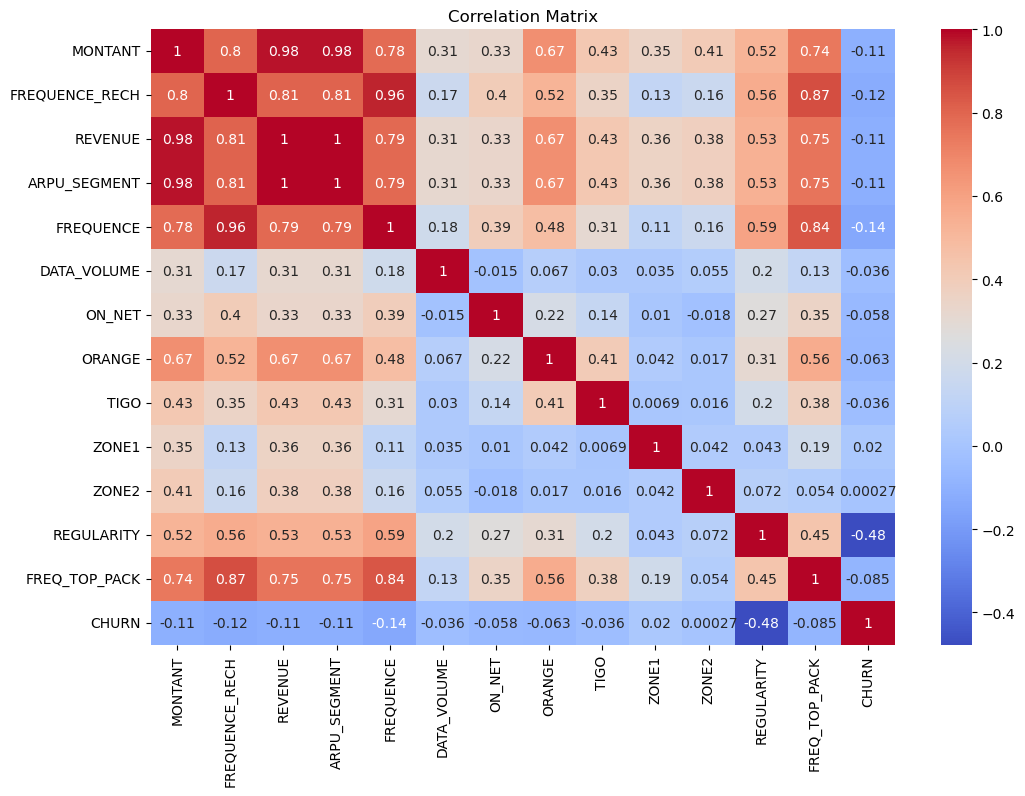

In [7]:
corr = train_num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
train_num_cols = train_num.columns.tolist()
train_num_cols

['MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'REGULARITY',
 'FREQ_TOP_PACK',
 'CHURN']

In [9]:
train_num_feat = ["FREQ_TOP_PACK", "REGULARITY", "ORANGE", "ON_NET", "DATA_VOLUME", "FREQUENCE", "REVENUE", "MONTANT"]

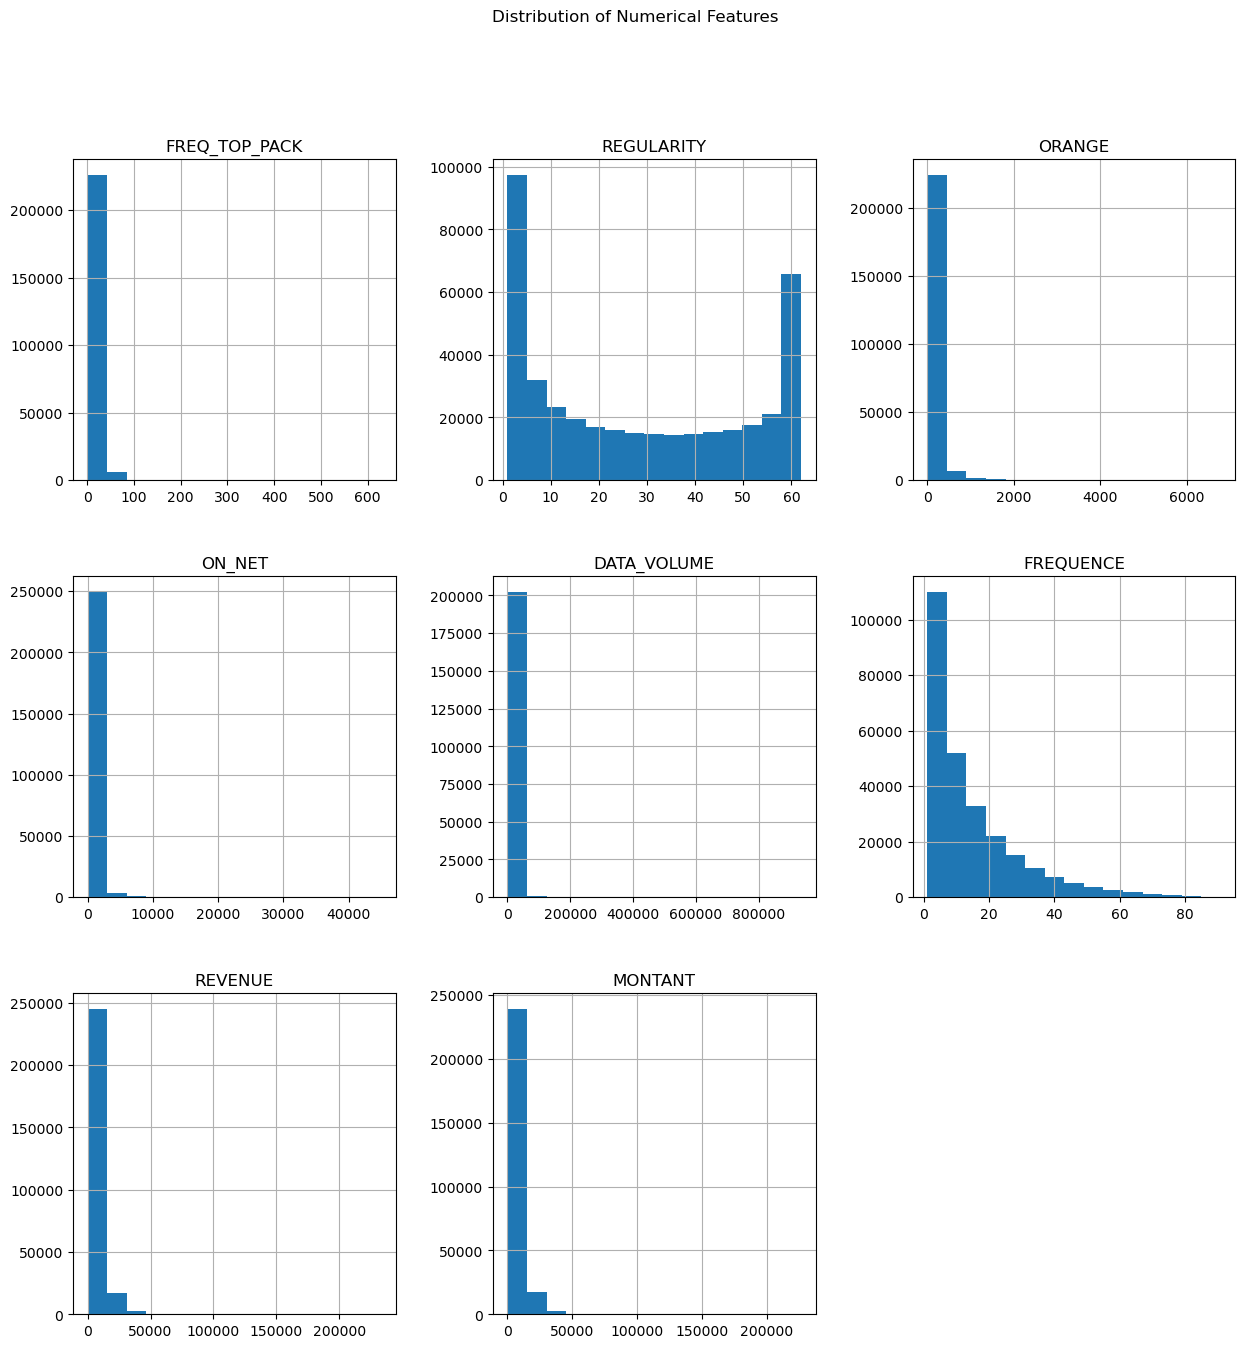

In [10]:
# Plot histograms for numerical features
train_num_feat = ["FREQ_TOP_PACK", "REGULARITY", "ORANGE", "ON_NET", "DATA_VOLUME", "FREQUENCE", "REVENUE", "MONTANT"]
train[train_num_feat].hist(figsize=(15, 15), bins=15)
plt.suptitle('Distribution of Numerical Features')
plt.show()

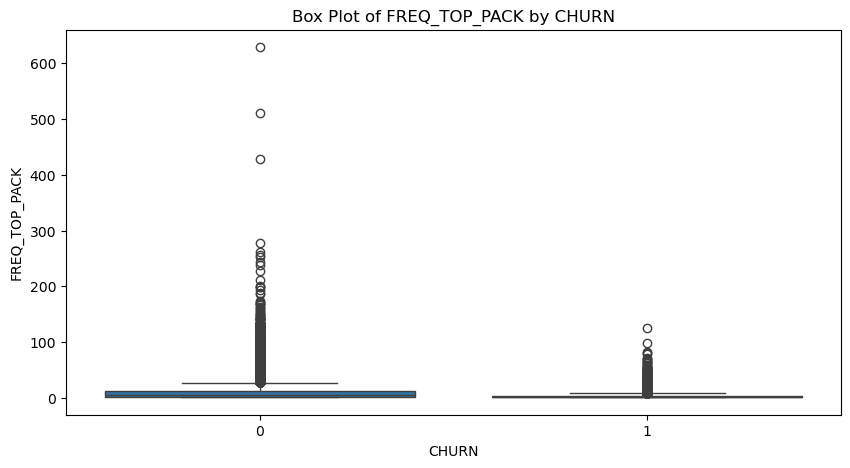

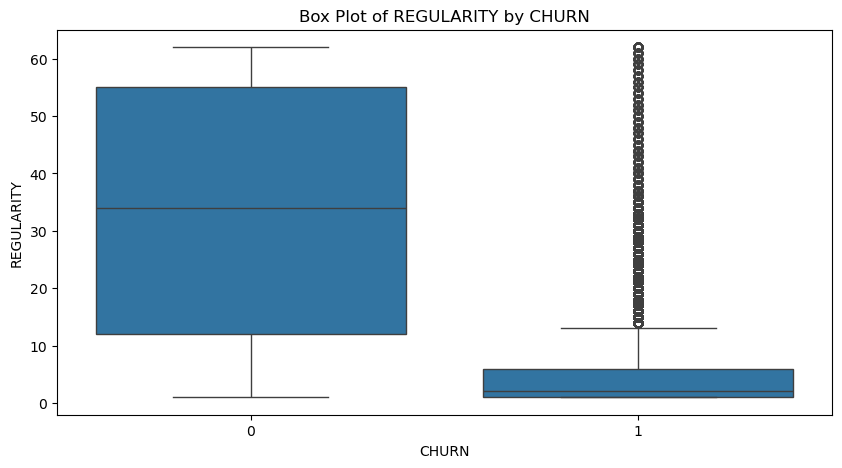

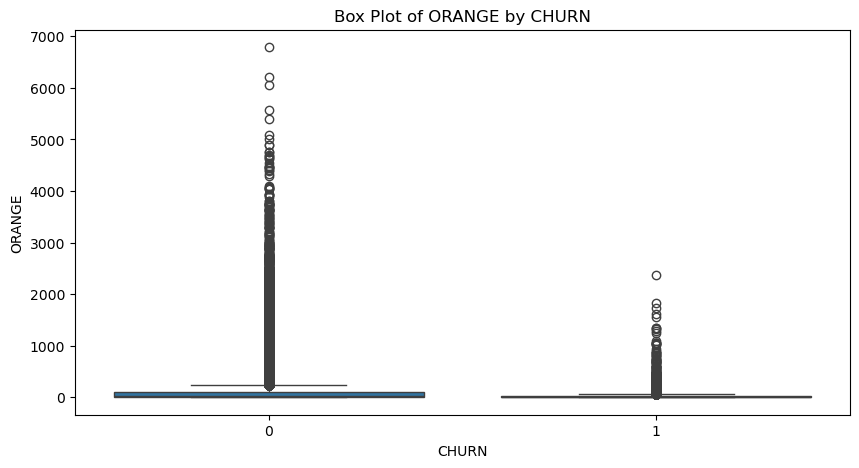

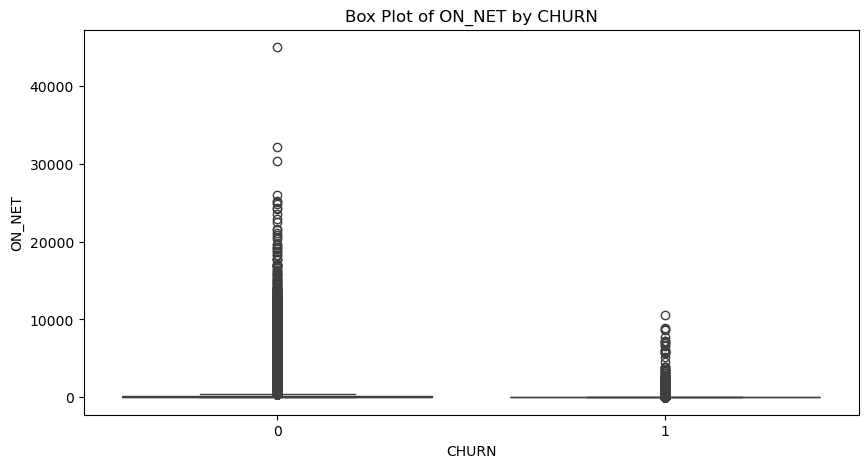

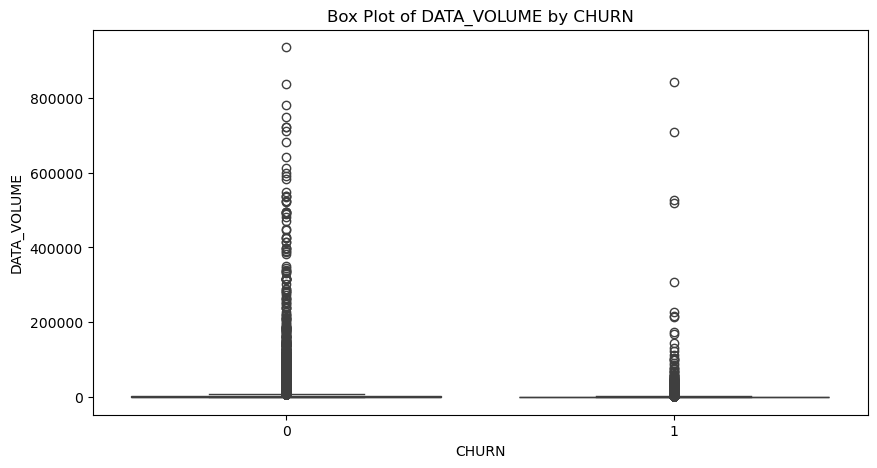

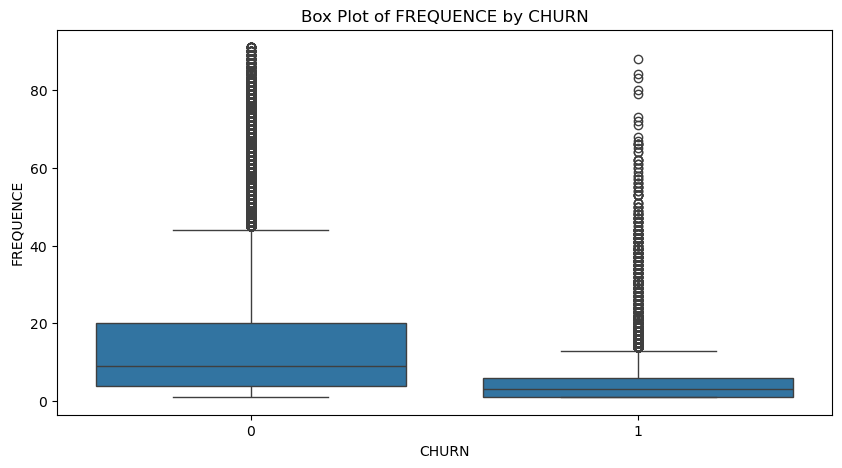

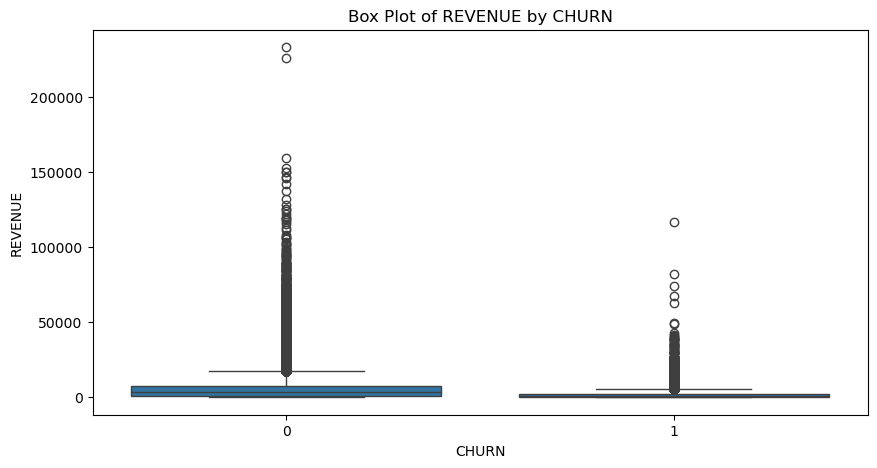

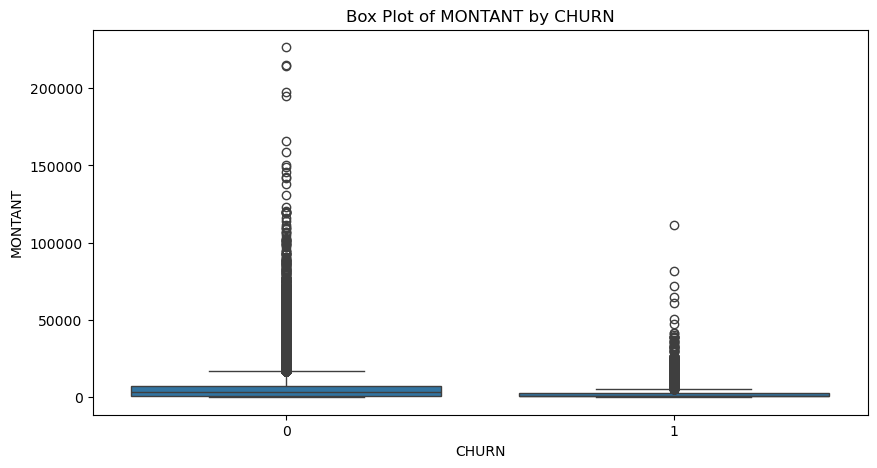

In [11]:
# Plot box plots for numerical features
for col in train_num_feat:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='CHURN', y=col, data=train)
    plt.title(f'Box Plot of {col} by CHURN')
    plt.show()

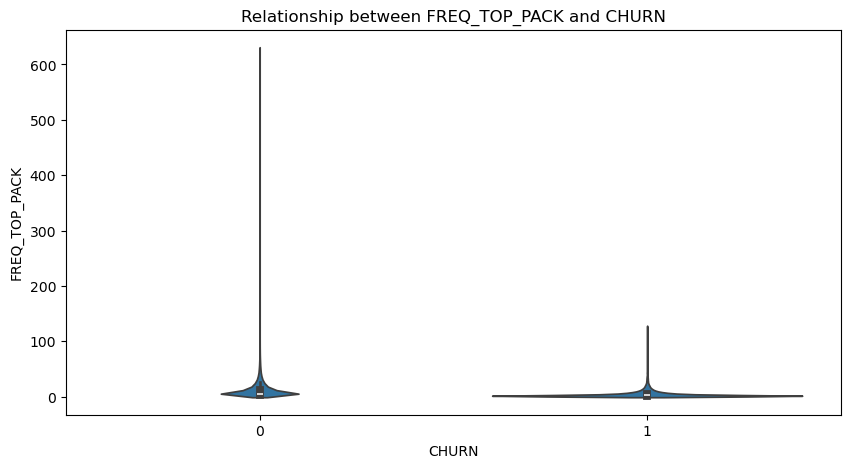

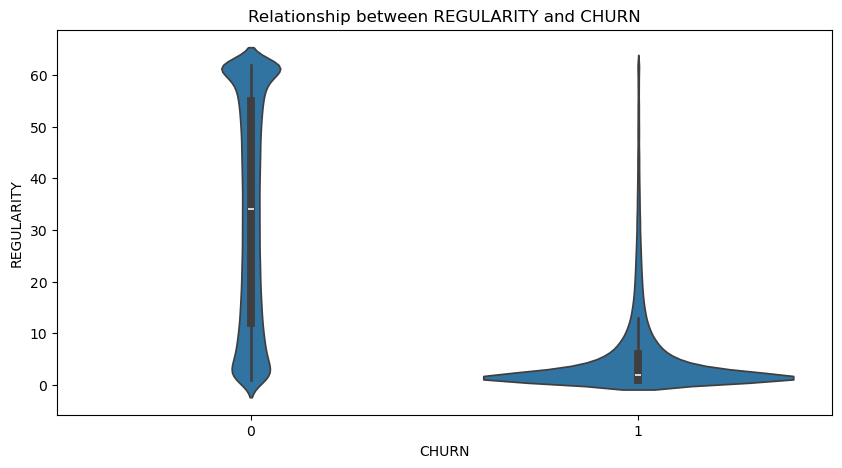

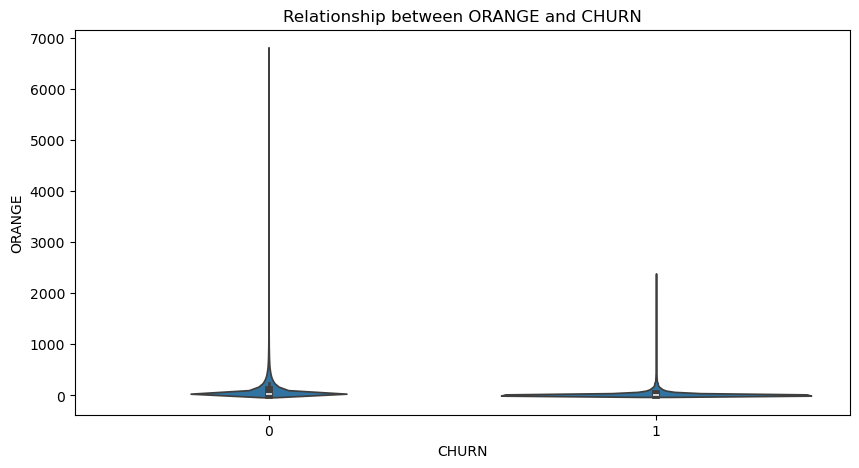

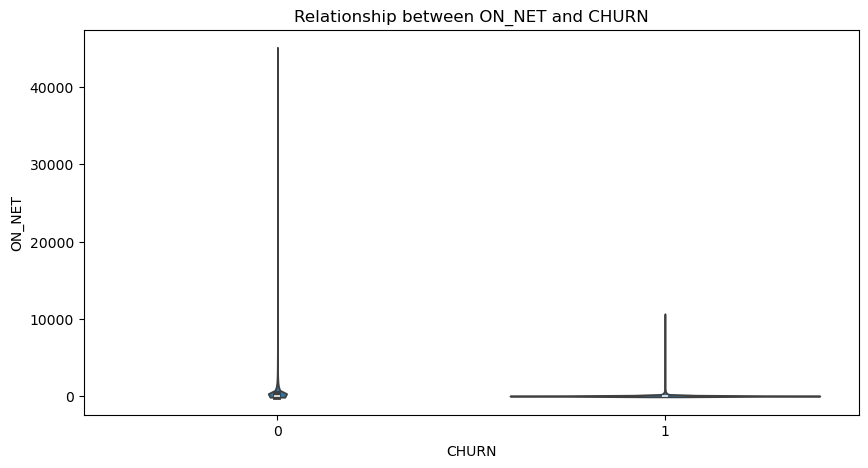

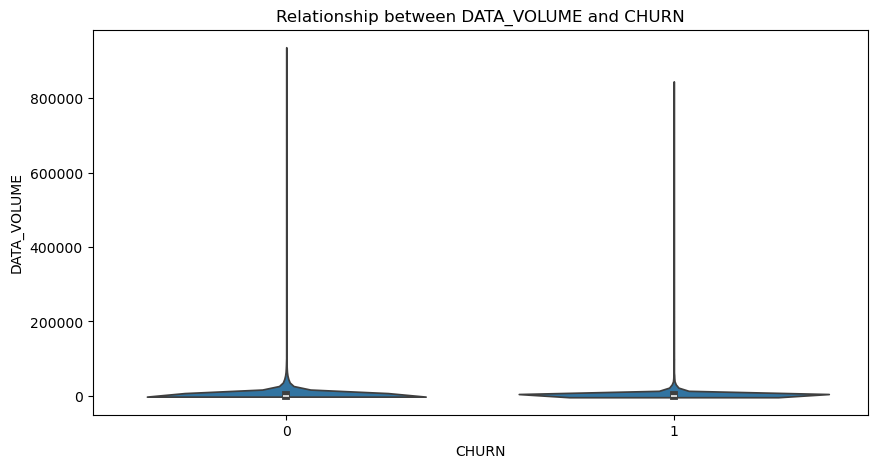

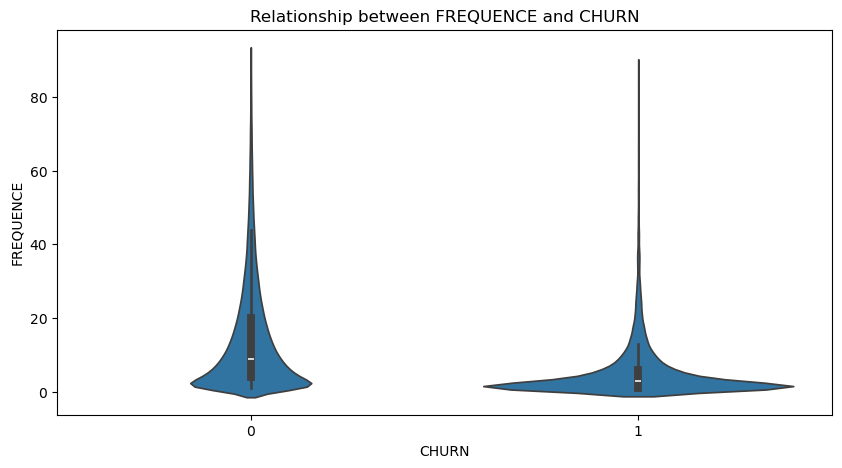

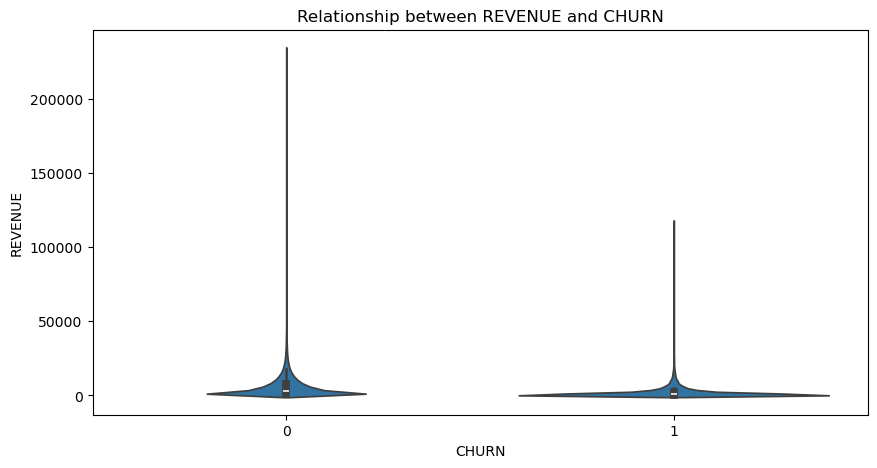

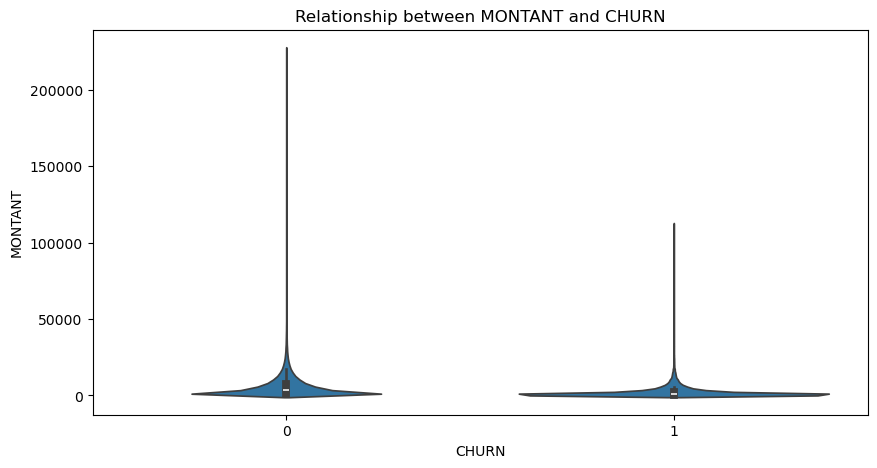

In [12]:
# Plot the relationship between numerical features and the target variable
for col in train_num_feat:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='CHURN', y=col, data=train)
    plt.title(f'Relationship between {col} and CHURN')
    plt.show();

In [13]:
# Calculate the correlation of features with the target variable 'CHURN'
corr_with_target = train_num.corr()['CHURN'].sort_values(ascending=False)
corr_with_target

CHURN             1.000000
ZONE1             0.019937
ZONE2             0.000273
TIGO             -0.035890
DATA_VOLUME      -0.036015
ON_NET           -0.057701
ORANGE           -0.063382
FREQ_TOP_PACK    -0.085136
MONTANT          -0.106229
REVENUE          -0.114822
ARPU_SEGMENT     -0.114822
FREQUENCE_RECH   -0.123113
FREQUENCE        -0.139685
REGULARITY       -0.479120
Name: CHURN, dtype: float64

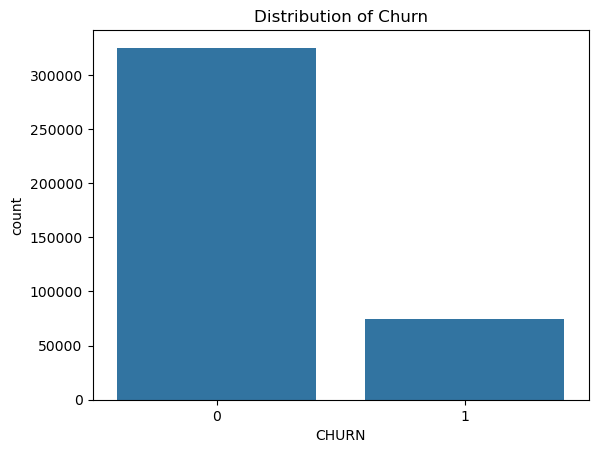

In [14]:
# Visualizing the target variable 'CHURN'
sns.countplot(x='CHURN', data=train)
plt.title('Distribution of Churn')
plt.show();

In [15]:
# Descriptive statistics of the training data
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


## Data Preprocessing

In [16]:
# Dropping target variable from training data
churn = train['CHURN']
train = train.drop('CHURN', axis=1)

In [17]:
# Combine train and test data for uniform preprocessing
d_tt = pd.concat([train, test], sort=False)
d_tt.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN


In [18]:
# Check for missing values
missing_values = d_tt.isnull().sum()
missing_values

user_id                0
REGION            196813
TENURE                 0
MONTANT           175228
FREQUENCE_RECH    175228
REVENUE           168153
ARPU_SEGMENT      168153
FREQUENCE         168153
DATA_VOLUME       246192
ON_NET            182202
ORANGE            207517
TIGO              299174
ZONE1             460630
ZONE2             468065
MRG                    0
REGULARITY             0
TOP_PACK          209032
FREQ_TOP_PACK     209032
dtype: int64

#### Handling missing values

In [19]:
# Calculate the percentage of missing values
percentage_missing = (missing_values / len(d_tt)) * 100

# Combine the missing values and their percentages into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})

# Display the DataFrame sorted by percentage of missing values in descending order
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
missing_data

,Missing Values,Percentage
ZONE2,468065,93.6130
ZONE1,460630,92.1260
TIGO,299174,59.8348
DATA_VOLUME,246192,49.2384
TOP_PACK,209032,41.8064
FREQ_TOP_PACK,209032,41.8064
ORANGE,207517,41.5034
REGION,196813,39.3626
ON_NET,182202,36.4404
MONTANT,175228,35.0456


In [20]:
# Drop columns with too many missing values or not useful for the model
d_tt = d_tt.drop(['ZONE1', 'ZONE2'], axis=1)

In [21]:
# Fill missing values in categorical columns with "Missing_{column_name}"
for col in d_tt.select_dtypes(include=['object']).columns:
    d_tt[col].fillna(f'Missing_{col}', inplace=True)

# Fill missing values in numerical columns with the median
for col in d_tt.select_dtypes(include=[np.number]).columns:
    d_tt[col].fillna(d_tt[col].median(), inplace=True)

# Verify that there are no missing values left
d_tt.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64

In [22]:
# View Overcorrelated columns
d_tt[['REVENUE','ARPU_SEGMENT']]

,REVENUE,ARPU_SEGMENT
0,18000.0,6000.0
1,4427.0,1476.0
2,1500.0,500.0
3,2497.0,832.0
4,498.0,166.0
...,...,...
99995,20.0,7.0
99996,998.0,333.0
99997,1799.0,600.0
99998,2515.0,838.0


In [23]:
# Drop Overcorrelated columns
d_tt = d_tt.drop(['REVENUE'], axis=1)
d_tt

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,6000.0,34.0,267.0,97.0,355.0,6.0,NO,62,All-net 500F=2000F;5d,35.0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,Missing_REGION,K > 24 month,4300.0,29.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NO,40,"Data: 100 F=40MB,24H",22.0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,500.0,3.0,267.0,30.0,30.0,6.0,NO,32,All-net 500F=2000F;5d,3.0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,832.0,4.0,0.0,159.0,45.0,19.0,NO,18,On net 200F=Unlimited _call24H,3.0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,3000.0,7.0,166.0,3.0,1.0,1.0,3.0,6.0,NO,50,Missing_TOP_PACK,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c6bcb3336795a18eb6c0bc7e19078a0704ef4d7e,LOUGA,K > 24 month,200.0,1.0,7.0,1.0,267.0,27.0,0.0,6.0,NO,46,Missing_TOP_PACK,5.0
99996,a44b4e44dc70115ed5bf971ebb4193dd536e87f0,TAMBACOUNDA,K > 24 month,1000.0,1.0,333.0,4.0,1.0,6.0,3.0,6.0,NO,26,Missing_TOP_PACK,5.0
99997,a2f84faffbc995bd0e2d726fa4ffdb93f11646ed,Missing_REGION,I 18-21 month,1800.0,7.0,600.0,9.0,81.0,2.0,0.0,6.0,NO,60,"Data:200F=Unlimited,24H",5.0
99998,afa76e894df4201fc77eb714de7d1f262299611a,THIES,K > 24 month,2500.0,4.0,838.0,4.0,267.0,43.0,106.0,4.0,NO,16,All-net 500F=2000F;5d,5.0


#### handling categorical columns

In [24]:
# Display the number of unique categories in all object columns
categorical_columns = d_tt.select_dtypes(include=['object']).columns

# Create a DataFrame to display the results
unique_categories = pd.DataFrame({
    'Column': categorical_columns,
    'Unique Categories': [d_tt[col].nunique() for col in categorical_columns]
})

unique_categories = unique_categories.sort_values(by='Unique Categories', ascending=False)
unique_categories

,Column,Unique Categories
0,user_id,500000
4,TOP_PACK,113
1,REGION,15
2,TENURE,8
3,MRG,1


In [25]:
d_tt['MRG'].value_counts()

MRG
NO    500000
Name: count, dtype: int64

In [26]:
d_tt = d_tt.drop(['MRG'], axis=1)

In [27]:
# Encode categorical variables
d_tt = pd.get_dummies(d_tt, columns=['REGION', 'TOP_PACK', 'TENURE'], drop_first=True)

In [28]:
# Drop the 'user_id' as it is not useful for the model
d_tt = d_tt.drop('user_id', axis=1)

In [29]:
# Split the combined data back into train and test sets
train = d_tt.iloc[:len(churn), :]
test = d_tt.iloc[len(churn):, :]

In [30]:
train

,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,...,TOP_PACK_pack_chinguitel_24h,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,17000.0,32.0,6000.0,34.0,267.0,97.0,355.0,6.0,62,35.0,...,False,False,False,False,False,False,False,False,False,True
1,4300.0,29.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,22.0,...,False,False,False,False,False,False,False,False,False,True
2,1500.0,3.0,500.0,3.0,267.0,30.0,30.0,6.0,32,3.0,...,False,False,False,False,False,False,False,False,False,True
3,1500.0,3.0,832.0,4.0,0.0,159.0,45.0,19.0,18,3.0,...,False,False,False,False,False,False,False,False,False,True
4,3000.0,7.0,166.0,3.0,1.0,1.0,3.0,6.0,50,5.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,700.0,2.0,235.0,3.0,267.0,12.0,14.0,6.0,46,1.0,...,False,False,False,False,False,False,False,False,False,True
399996,3000.0,7.0,1000.0,9.0,267.0,27.0,29.0,6.0,14,5.0,...,False,False,False,False,False,False,False,False,False,True
399997,700.0,2.0,233.0,5.0,237.0,1.0,29.0,6.0,15,3.0,...,False,False,False,False,False,False,False,False,False,True
399998,3000.0,7.0,3.0,1.0,0.0,27.0,0.0,6.0,5,5.0,...,False,False,False,False,False,False,False,False,False,True


## Build Model 
Using the CatBoostClassifier for the binary classification task.

In [31]:
# Splitting the training data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(train, churn, test_size=0.2, random_state=101)

In [32]:
# Initializing and training the CatBoostClassifier
classifier = CatBoostClassifier(loss_function='Logloss', learning_rate=0.01, use_best_model=True, eval_metric='Logloss')
classifier.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=100, verbose=100)

0:	learn: 0.6771528	test: 0.6771241	best: 0.6771241 (0)	total: 214ms	remaining: 3m 34s
100:	learn: 0.2735266	test: 0.2734142	best: 0.2734142 (100)	total: 6.44s	remaining: 57.4s
200:	learn: 0.2566263	test: 0.2570409	best: 0.2570409 (200)	total: 13.1s	remaining: 52.1s
300:	learn: 0.2541459	test: 0.2549037	best: 0.2549037 (300)	total: 19.2s	remaining: 44.5s
400:	learn: 0.2532125	test: 0.2541771	best: 0.2541771 (400)	total: 25s	remaining: 37.4s
500:	learn: 0.2527147	test: 0.2538600	best: 0.2538600 (500)	total: 30.6s	remaining: 30.4s
600:	learn: 0.2523645	test: 0.2536900	best: 0.2536900 (600)	total: 37.8s	remaining: 25.1s
700:	learn: 0.2520767	test: 0.2535516	best: 0.2535516 (700)	total: 44.5s	remaining: 19s
800:	learn: 0.2518387	test: 0.2534603	best: 0.2534603 (800)	total: 50s	remaining: 12.4s
900:	learn: 0.2516077	test: 0.2533718	best: 0.2533718 (900)	total: 55.4s	remaining: 6.09s
999:	learn: 0.2514049	test: 0.2532997	best: 0.2532997 (999)	total: 1m	remaining: 0us

bestTest = 0.2532997346

## Model Evaluation
Evaluating the model on the validation set

In [33]:
Y_pred = classifier.predict(X_val)
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Classification Report:\n", classification_report(Y_val, Y_pred))

Accuracy: 0.878375
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     65064
           1       0.68      0.65      0.67     14936

    accuracy                           0.88     80000
   macro avg       0.80      0.79      0.80     80000
weighted avg       0.88      0.88      0.88     80000



In [34]:
# Predicting probabilities for log loss calculation
Y_pred_proba = classifier.predict_proba(X_val)[:, 1]
print("Log Loss:", log_loss(Y_val, Y_pred_proba))

Log Loss: 0.2532997345572907


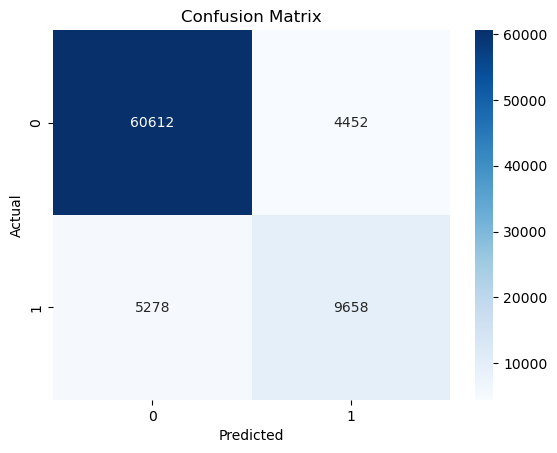

In [35]:
# Confusion matrix
cm = confusion_matrix(Y_val, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance
Plotting feature importances to understand which features the model found most useful

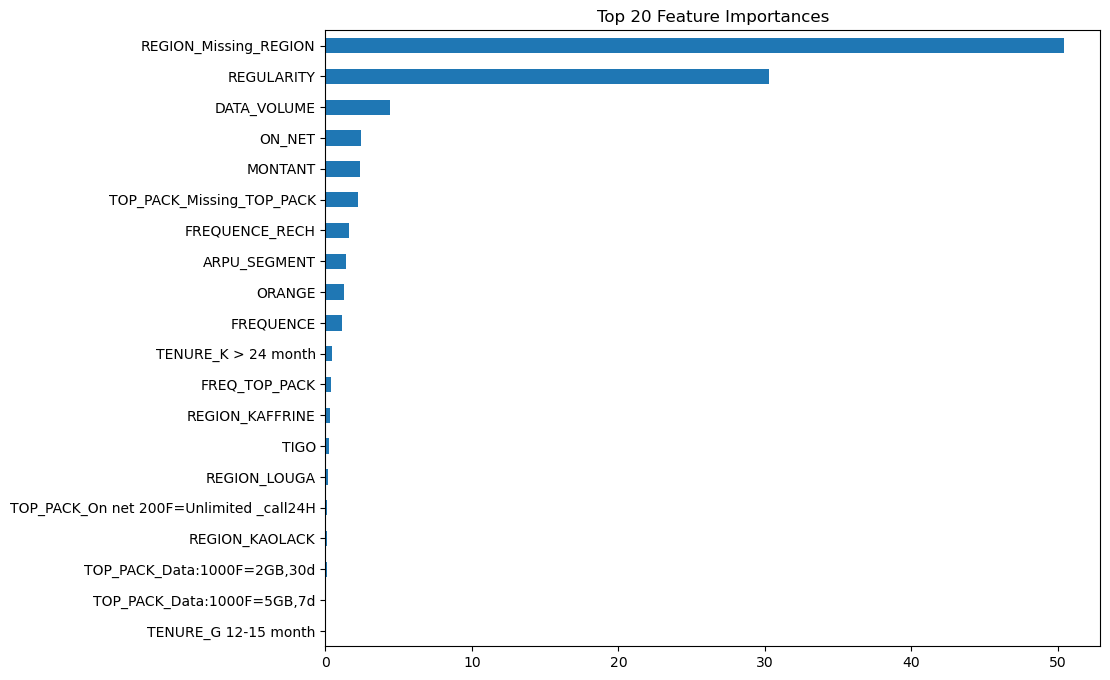

In [36]:
# Get the feature importances from the classifier
feat_importances = pd.Series(classifier.feature_importances_, index=X_train.columns)

# Sort the feature importances and select the top 20
top_20_features = feat_importances.sort_values(ascending=False).head(20)

# Plot the top 20 feature importances
top_20_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 20 Feature Importances')
plt.show()

In [37]:
## Making Predictions on Test Data
# Finally, we use the trained model to make predictions on the test set and prepare the submission file.
predictions = classifier.predict_proba(test)[:, 1]
baseline_sub = sample_sub.copy()
baseline_sub['CHURN'] = predictions
baseline_sub.to_csv('Ibrahim2_baseline_submission_catboost_expresso.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.781511
1,5335efd940280b82143272275637d1e65d37eadb,0.652673
2,a581f4fa08677c26f83f643248c667e241043086,0.106741
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.001322
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.000338
